In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
#importing all important libraries
import pandas as pd # pandas library to work with dataframes
import numpy as np # numpy library to work with numerical or array functions
import matplotlib.pyplot as plt # matplotib is visualization library
import seaborn as sns # seaborn visualization library
%matplotlib inline 
# load data
file_path = r"D:\WebNeuralInfotech\Data Cleaning\snapdeal_products.csv"
df = pd.read_csv(file_path)

In [9]:
# Check for data types and any null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  20 non-null     object 
 1   Price         20 non-null     object 
 2   Rating        20 non-null     object 
 3   Reviews       0 non-null      float64
 4   Category      20 non-null     object 
 5   Seller Info   0 non-null      float64
 6   Discount      0 non-null      float64
 7   Stock Status  20 non-null     object 
dtypes: float64(3), object(5)
memory usage: 1.4+ KB
None


In [10]:
# Check for the first few rows
df.head()

,Product Name,Price,Rating,Reviews,Category,Seller Info,Discount,Stock Status
0,Tapixaa Mini Electric Shaver Multicolor Cordle...,Rs. 307,74.00%,NaN,Electronics,NaN,NaN,Out of Stock
1,Needx Silver 1.8 litres Stainless Steel Multif...,Rs. 584,92.00%,NaN,Electronics,NaN,NaN,Out of Stock
2,Mini Electric 150 Watt Stainless Steel Mixer G...,Rs. 498,76.00%,NaN,Electronics,NaN,NaN,Out of Stock
3,Orpat - Express Chopper Purple Electric Push B...,"Rs. 1,026",90.00%,NaN,Electronics,NaN,NaN,Out of Stock
4,Orpat - Express Chopper White Electric Push Bu...,"Rs. 1,026",90.00%,NaN,Electronics,NaN,NaN,Out of Stock


In [11]:
df.describe()

,Reviews,Seller Info,Discount
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [12]:
#checking Missing values & handling it
print(df.isnull().sum())

Product Name     0
Price            0
Rating           0
Reviews         20
Category         0
Seller Info     20
Discount        20
Stock Status     0
dtype: int64


In [13]:
# Remove the percentage sign and convert to float
df['Rating'] = df['Rating'].replace('%', '', regex=True).astype(float)

# Optional: If you want to make sure the values are within a valid range (e.g., 0-100)
df['Rating'] = df['Rating'].clip(0, 100)

# Check the cleaned 'Rating' column
print(df['Rating'].head())

0    74.0
1    92.0
2    76.0
3    90.0
4    90.0
Name: Rating, dtype: float64


In [14]:
# Drop columns with too many missing values (threshold can be set based on your needs)
df = df.dropna(axis=1, thresh=len(df)*0.5)  # Drop columns with less than 50% non-null values

# Fill missing numerical columns with the mean or median
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())  # Replace missing ratings with mean

# Fill missing categorical columns with the mode
df['Category'] = df['Category'].fillna(df['Category'].mode()[0])  # Replace missing categories with the most frequent value

# Drop rows where 'Rating' is missing (if applicable)
df = df.dropna(subset=['Rating'])

# Check if there are any missing values left
print(df.isnull().sum())

Product Name    0
Price           0
Rating          0
Category        0
Stock Status    0
dtype: int64


In [15]:
#Removing duplicates
df = df.drop_duplicates()

In [16]:
#converting Data types
df['Stock Status'] = df['Stock Status'].astype('category')

In [17]:
# Step 1: Convert the Price column to strings to use .str methods (handle NaN properly)
df['Price'] = df['Price'].astype(str)

# Step 2: Remove unwanted characters ('Rs.') and commas
df['Price'] = df['Price'].str.replace('Rs.', '', regex=True).str.replace(',', '', regex=True)

# Step 3: Replace empty strings with NaN
df['Price'] = df['Price'].replace('nan', np.nan)  # Ensure 'nan' string is treated as NaN

# Step 4: Convert the column to numeric (integer values for valid numbers, NaN for invalid)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce', downcast='integer')

In [18]:
df

,Product Name,Price,Rating,Category,Stock Status
0,Tapixaa Mini Electric Shaver Multicolor Cordle...,307,74.0,Electronics,Out of Stock
1,Needx Silver 1.8 litres Stainless Steel Multif...,584,92.0,Electronics,Out of Stock
2,Mini Electric 150 Watt Stainless Steel Mixer G...,498,76.0,Electronics,Out of Stock
3,Orpat - Express Chopper Purple Electric Push B...,1026,90.0,Electronics,Out of Stock
4,Orpat - Express Chopper White Electric Push Bu...,1026,90.0,Electronics,Out of Stock
5,SmartBucket - Dispenser Tap Compatible with No...,177,92.0,Electronics,Out of Stock
6,Milton Go Electro 1.5 Stainless Steel Electric...,749,86.0,Electronics,Out of Stock
7,Scarlett - Silver 2 litres Stainless Steel Wat...,666,86.0,Electronics,Out of Stock
8,Milton Go Electro 2.0 Stainless Steel Electric...,799,84.0,Electronics,Out of Stock
9,Milton Go Electro 1.2 Stainless Steel Electric...,699,84.0,Electronics,Out of Stock


In [19]:
df['Stock Status'] = df['Stock Status'].replace({'Out of Stock': 0, 'In Stock': 1})

C:\Users\Admin\AppData\Local\Temp\ipykernel_5024\975565715.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Stock Status'] = df['Stock Status'].replace({'Out of Stock': 0, 'In Stock': 1})
C:\Users\Admin\AppData\Local\Temp\ipykernel_5024\975565715.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Stock Status'] = df['Stock Status'].replace({'Out of Stock': 0, 'In Stock': 1})


In [20]:
df

,Product Name,Price,Rating,Category,Stock Status
0,Tapixaa Mini Electric Shaver Multicolor Cordle...,307,74.0,Electronics,0
1,Needx Silver 1.8 litres Stainless Steel Multif...,584,92.0,Electronics,0
2,Mini Electric 150 Watt Stainless Steel Mixer G...,498,76.0,Electronics,0
3,Orpat - Express Chopper Purple Electric Push B...,1026,90.0,Electronics,0
4,Orpat - Express Chopper White Electric Push Bu...,1026,90.0,Electronics,0
5,SmartBucket - Dispenser Tap Compatible with No...,177,92.0,Electronics,0
6,Milton Go Electro 1.5 Stainless Steel Electric...,749,86.0,Electronics,0
7,Scarlett - Silver 2 litres Stainless Steel Wat...,666,86.0,Electronics,0
8,Milton Go Electro 2.0 Stainless Steel Electric...,799,84.0,Electronics,0
9,Milton Go Electro 1.2 Stainless Steel Electric...,699,84.0,Electronics,0


Text(0, 0.5, 'Frequency')

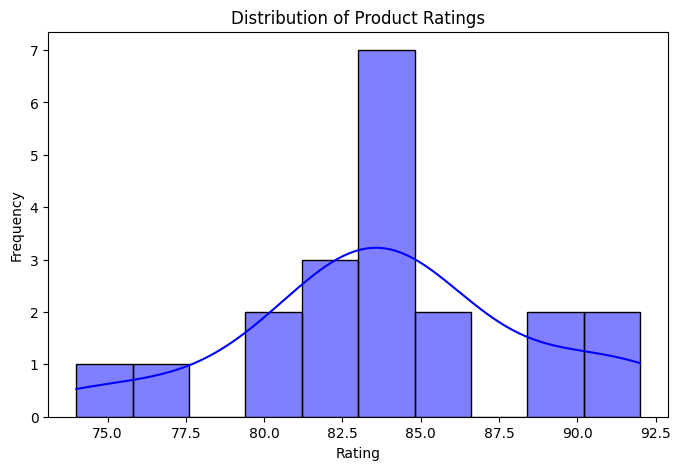

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], kde=True, bins=10, color='blue')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

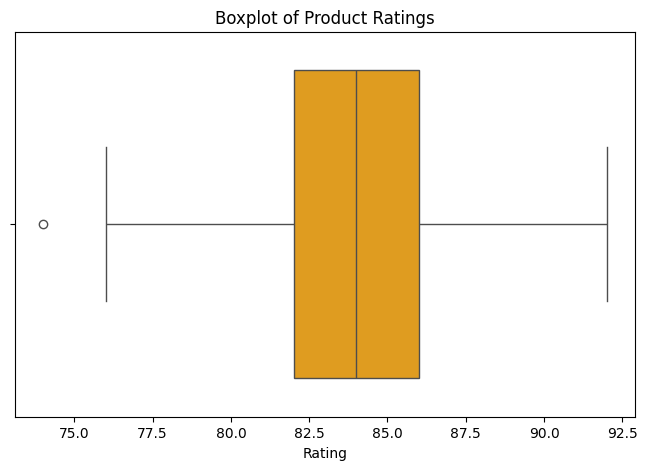

In [22]:
# Boxplot to show rating distribution and outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Rating'], color='orange')
plt.title('Boxplot of Product Ratings')
plt.show()

In [23]:
# For numerical columns 'Rating' filter extreme outliers (e.g., > 100 or < 0)
df = df[df['Rating'] <= 100]

# Or use the IQR method to filter out outliers
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Rating'] >= (Q1 - 1.5 * IQR)) & (df['Rating'] <= (Q3 + 1.5 * IQR))]

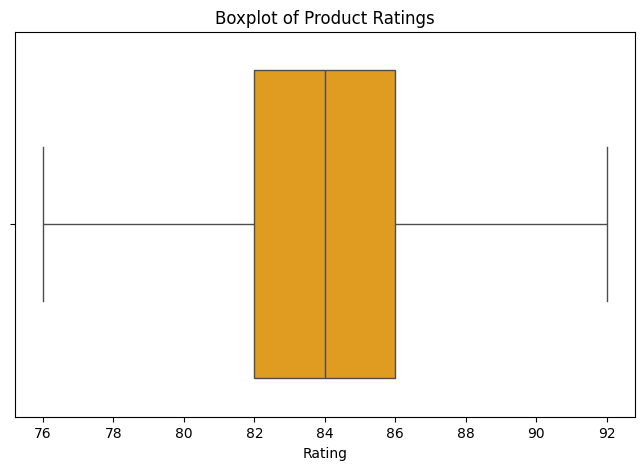

In [24]:
# Boxplot to show rating distribution and outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Rating'], color='orange')
plt.title('Boxplot of Product Ratings')
plt.show()

In [25]:
df

,Product Name,Price,Rating,Category,Stock Status
1,Needx Silver 1.8 litres Stainless Steel Multif...,584,92.0,Electronics,0
2,Mini Electric 150 Watt Stainless Steel Mixer G...,498,76.0,Electronics,0
3,Orpat - Express Chopper Purple Electric Push B...,1026,90.0,Electronics,0
4,Orpat - Express Chopper White Electric Push Bu...,1026,90.0,Electronics,0
5,SmartBucket - Dispenser Tap Compatible with No...,177,92.0,Electronics,0
6,Milton Go Electro 1.5 Stainless Steel Electric...,749,86.0,Electronics,0
7,Scarlett - Silver 2 litres Stainless Steel Wat...,666,86.0,Electronics,0
8,Milton Go Electro 2.0 Stainless Steel Electric...,799,84.0,Electronics,0
9,Milton Go Electro 1.2 Stainless Steel Electric...,699,84.0,Electronics,0
10,2 In 1 Multifunctional Steaming Device Frying ...,525,84.0,Electronics,0


In [26]:
df.to_csv("cleaned_snapdeal_data.csv", index=False)